# Titanic passengers survival analysis Kaggle competition

In this notebook we will conduct data analysis and predictive modelling of Titanic passengers survival dataset for Kaggle [Titanic dataset](https://www.kaggle.com/c/titanic).

Titanic passengers survival dataset is one of the most canonical data analysis and machine learning datasets. Let's see how this data looks like, investigate main trends in it and try to predict survival chances of passengers based on numerous features.

The main steps of the analysis process we will conduct are:
1. Frame the problem
2. Get the data
3. Explore the data
4. Prepare the data for machine learning algorithms
5. Select a model and train it
6. Fine-tune the model
7. Submit solution

In [183]:
import numpy as np

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from pywaffle import Waffle

import warnings
warnings.filterwarnings('ignore')

## 1. Frame the problem

Titanic sinking was one of the biggest shipwreck tragedies in history. It killed 1502 out of 2224 passengers. This tragedy led to better safety regulations for ships. The main reason for such a great death toll was not enough number of lifeboats to fit all passengers. This can lead to the conclusion that some groups of people were more likely to survive than others - woman, children and upper-class passeners for example.

### 1.1 The goal

The goal of this analysis is two fold. Firstly, we want to analyse the data set, explore it answering related questions using data visualization and statistical methods. Secondly our goal is to predict which passengers were likely to survive Titanic catastrophy and which not. For each `PassengerId` in the provided unlabeled test set, we want to predict a whether given passenger survived or not.

### 1.2 Analysis

There are some questions we would like to answer with Titanic dataset analysis.

* What is Titanic passengers demographic structure analyzed in terms of attributes?

* What is the overall Titanic passengers survival ratio?

* What is the survival ratio for different demographic passengers groups? Which groups have biggest chances for survival and which smallest?

* Is the difference between survived group statistically significant as compared to the rest of population? Were the differences between the most distinct groups statistically significant? 

### 1.3 Modeling

As for second goal, since we are given multiple features data with labeled survival values this is clearly an supervised learning problem. Moreover we try to predict discrete categorical value: 0 or 1 (representing not-survived and survived passenger). This tells us that we deal here with binary categorization problem.

As a measure of created machine learning models performance we choose the percentage of passengers we correctly predict, that is accuracy level.

As a final product we will prepare and submit a csv file with predicted survival for exactly 418 entries in the test dataset. The file should have exactly 2 columns:
* PassengerId (sorted in any order)
* Survived (contains your binary predictions: 1 for survived, 0 for deceased)

The example submission dataset should look like this:
```
PassengerId,Survived
 892,0
 893,1
 894,0
 Etc.
```

## 2. Get the data

Let's get through the process of acquiring the dataset.

### 2.1 Download and load the data.

We first download the dataset from Kaggle website. We will first list all files we downloaded.

In [115]:
!ls datasets/

data_description.txt  submission.csv        train.csv
gender_submission.csv test.csv


Now let's start by looking at the data description from Kaggle.

In [116]:
!cat datasets/data_description.txt

Data Dictionary:
survival	Survival		0 = No, 1 = Yes
pclass		Ticket class		1 = 1st, 2 = 2nd, 3 = 3rd
sex		Sex	
Age             Age in years	
sibsp		# of siblings / spouses aboard the Titanic	
parch		# of parents / children aboard the Titanic	
ticket		Ticket number	
fare		Passenger fare	
cabin		Cabin number	
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton


Variable Notes:
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

We see all the details we need to understand data notation here.

We also know that the data has been already split for us into two groups:
* training set (train.csv) - used in data analysis and machine learning model training
* test set (test.csv) - used for machine learning model testing

That is why we do not have to prepare test dataset in this analysis. 

We are now ready to load and look at our dataset.

In [117]:
import pandas as pd

titanic_train = pd.read_csv("datasets/train.csv")

### 2.2 Take a quick look at the data

Let's see how our data looks like.

In [118]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Assuming that `PassengerId` attribute values are unique (and they are) let's first make `PassengerId` our index column.

In [119]:
titanic_train = titanic_train.set_index("PassengerId")
titanic_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


As we can see the dataset contains not that many attributes: we have 11 of them. Six of them are numeric: `Survived` (informing whether passenger survived or not), `Pclass` (passenger class), `Age`, `SibSp` (number of siblings/spouses aboard), `Parch` (number of parents/children aboard), `Fare`. Out of these six `Survived` and `Pclass` attributes are numerically encoded categorical values meaning that calculating descriptive statistics for them is meaningless.

Five attributes are categorical textual values: `Name`, `Sex`, `Ticket`, `Cabin`, `Embarked` (port of embarkation C=Cherbourg, Q=Queenstown, S=Southampton). Our dataset the target attribute is `Survived` marking whether passenger survived or not with 1 or 0 respectively.

Let's have a closer look at attributes structure.

In [120]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


All in all the dataset contains 891 passengers data out of all 2224 passengers.

We deal here with some missing values. The most missing values are in `Cabin` attribute. That column seems not so much informative and the data if rather scarse which would suggesting droping these feature when preparing training dataset for machine learning. We have also a lot of missing values in `Age` column however this column seems crucial for our analysis. That is why later on we will have to take care of these missing values either by filling them in (e.g. median value) or by dropping examples with missing values. In `Embarked` attribute values we miss only two values so we can easily drop these two cases later on when preparing the dataset for modelling algorithms.

We again see that five attributes have categorical/text values - we will also deal with that later when preparing data for modelling.


Let's now see some details about numerical values we have in the dataset.

In [121]:
titanic_train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The only attributes for which calculating statistical values make sense are `Age`, `SibSp`, `Parch` and `Fare`  attributes. We will analyse this demographical passengers structure a bit more later on. All in all the values look correct and it seems it needs no more corrections at this stage of the project. 

We can also see here that atrributes values ranges are very different between themselves and will have to be standardized later on when preparing data for modeling.

We are ready to move to the data exploration phase.

## 3. Explore the data

Let's now dig deeper into data internal structure and values.

### 3.1 Attributes analysis

Let's first look at the general numeric data distributions including the target value `Survived` attribute.

In [122]:
titanic_train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


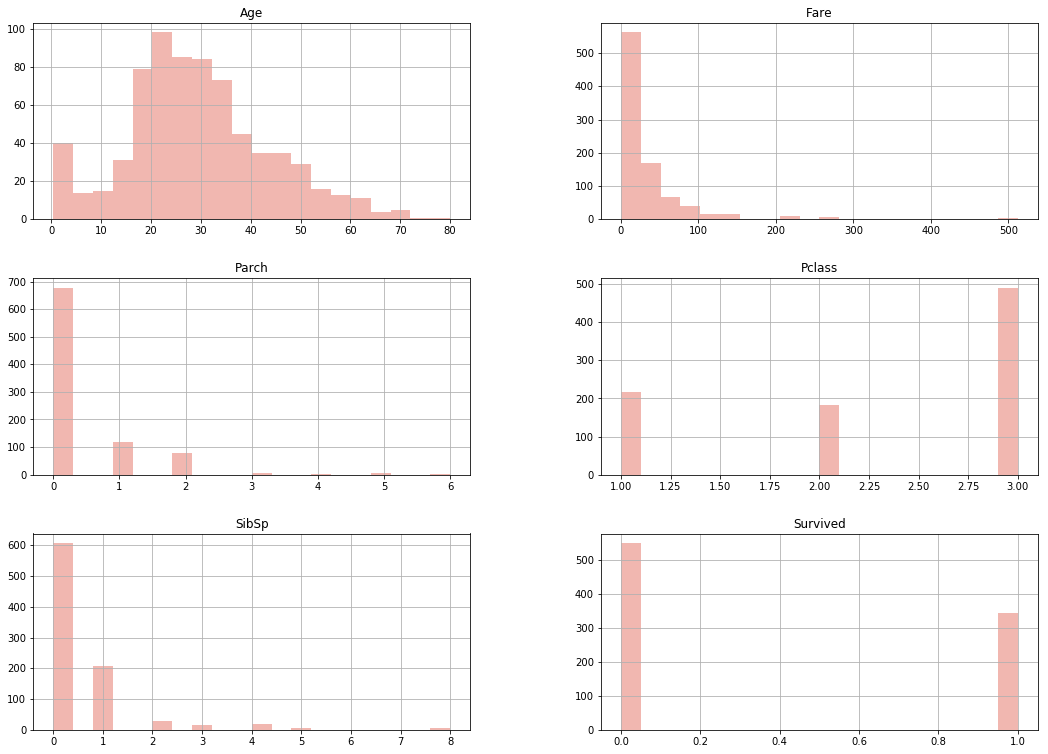

In [123]:
%matplotlib inline 
import matplotlib.pyplot as plt

titanic_train.hist(bins=20, figsize=(18, 13), color="#f1b7b0")
plt.show()

We notice a few things in these histograms: 
- `Age` distribution is centered around 20-30 years old group ranging to 80 with quite large number of children aged 0-5; the minimal age value is 0.42 and the maximal is 80; the mean value is 29.6991 with quit large standard deviation of 14.5264; the median value is 28.
- `Fare` attribute values distribution is strongly positevely skewed with mean 32.2042 and large stadard deviation of 49.6934; because the distribution is skewed median is much smaller than the mean with value of 14.4542; the range of data is large ranging from 0 to 512; at the same time 75% of the data is lower than 31. 
- `Parch` (the number of parents/children aboard) distribution mode is 0 by far meaning that most of the passengers traveled without any parents/children and also there are some outlier values with 3 and more parents/children aboard.
- `Pclass` distribution shows that almost 500 out of all 891 passengers in the dataset were travelling the 3rd (lowest) class and almost 200 passengers were travelling both in 1st and 2nd class.
- `SibSp` (number of siblings/spouses aboard) is similar to `Parch` distribution but with larger number of passengers travelling with one sibling/spouse.
- `Survived` obviously shows only two values but we can also see that number of survivors is much smaller than the number of passengers who died in the catastrophy.

Let's also look at catgorical attributes values: `Name`, `Sex`, `Ticket`, `Cabin`, `Embarked`.

In [124]:
titanic_train["Name"].value_counts()

Lahtinen, Mrs. William (Anna Sylfven)                        1
Chapman, Mr. Charles Henry                                   1
Eklund, Mr. Hans Linus                                       1
Harris, Mr. Henry Birkhardt                                  1
Kassem, Mr. Fared                                            1
Laroche, Mrs. Joseph (Juliette Marie Louise Lafargue)        1
Todoroff, Mr. Lalio                                          1
Carlsson, Mr. August Sigfrid                                 1
Harper, Rev. John                                            1
Leitch, Miss. Jessie Wills                                   1
Hamalainen, Master. Viljo                                    1
Hendekovic, Mr. Ignjac                                       1
Spencer, Mrs. William Augustus (Marie Eugenie)               1
Lemore, Mrs. (Amelia Milley)                                 1
Hocking, Mr. Richard George                                  1
Wiklund, Mr. Jakob Alfred                              

`Names`, by definition, are rather unique so its distribution would be flat. It is not categorical attribute then - just textual. This tells us that in modelling phase this value will not be of too much help since there are no group of values that model can identify.

In [125]:
titanic_train["Ticket"].value_counts()

CA. 2343             7
1601                 7
347082               7
3101295              6
CA 2144              6
347088               6
S.O.C. 14879         5
382652               5
LINE                 4
17421                4
349909               4
4133                 4
PC 17757             4
19950                4
2666                 4
113781               4
W./C. 6608           4
113760               4
347077               4
PC 17572             3
363291               3
SC/Paris 2123        3
239853               3
C.A. 31921           3
29106                3
110152               3
C.A. 34651           3
PC 17755             3
35273                3
PC 17582             3
                    ..
A/4 45380            1
29108                1
315088               1
F.C.C. 13528         1
STON/O2. 3101282     1
349216               1
250652               1
36866                1
349203               1
364500               1
C.A. 29178           1
17764                1
STON/O 2. 3

`Ticket` attribute is also not a classical categorical attribute with multiple unique or close to unoque values. There some values repetition but rather tickets identifiers (as we assume they are) are rather unique. This again can lead to the conclusion that this data will not be helpful in survival prediction model.

In [126]:
titanic_train["Cabin"].value_counts()

B96 B98            4
C23 C25 C27        4
G6                 4
C22 C26            3
E101               3
F33                3
D                  3
F2                 3
D33                2
B18                2
E8                 2
F4                 2
E25                2
C52                2
E67                2
C2                 2
C65                2
D35                2
C126               2
D17                2
B5                 2
B22                2
B57 B59 B63 B66    2
E24                2
D36                2
C123               2
B35                2
C92                2
C93                2
F G73              2
                  ..
A23                1
B42                1
E17                1
D21                1
C110               1
A19                1
D7                 1
E40                1
D6                 1
C85                1
A34                1
C103               1
C82                1
E77                1
D46                1
B4                 1
B71          

`Cabin` is similar in structure to the `Name` and `Ticket` attributes. It is again rather textual attribute and note categorical. As we also seen earlier this is the attribute with the biggest number of missing data: we have only 204 values out of all 891 passengers and the rest is missing. All this suggest that also this attribute will not be of much help during the modeling phase of this project.

In [127]:
titanic_train["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

`Sex` attribute has only two possible values: `male` and `female`. It is a categorical attribute. Let's plot it.

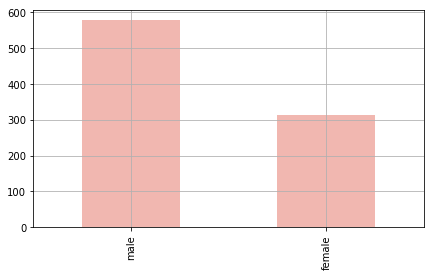

In [128]:
titanic_train["Sex"].value_counts().plot(kind='bar', figsize=(7, 4), grid=True, color="#f1b7b0")

We see that on Titanic (as measured by analysed dataset) there were almost twice as much males than females.

In [129]:
titanic_train["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

`Embarked` attribute has three possible values: `S`, `C` and `Q` (standing for Southampton, Cherbourg or Queenstown city of embarkation) meaning that it is categorical attribute. Let's plot it's values.

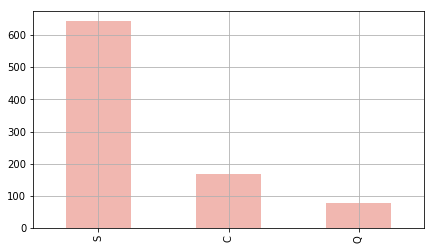

In [130]:
titanic_train["Embarked"].value_counts().plot(kind='bar', figsize=(7, 4), grid=True, color="#f1b7b0")

We can see that vast majority of passengers embarked in Southampton port, less than 200 passengers embarked in Cherbourg and less then embarked in Queenstown. For now we can tell nothing more out of it but later on we will try to see how this attribute values affected the survival chances of passengers.

It looks like we have 7 attributes that we can explore for how their values affect pasengers the survival chances. These are the five numerical attributes: `Pclass` (passenger class), `Age` (passenger age), `SibSp` (number of siblings/spouses aboard), `Parch` (number of parents/children aboard), `Fare` (fare passenger paid). There are also two categorical attributes that looks like factors that can be analysed for influencing passengers survival chances: `Sex` (passenger sex) and `Embarked` (port of embarkation). 

In further analysis and modelling we will concentrate on these attributes when analysing and modeling passengers survival chances. `Name`, `Ticket` and `Cabin` attributes are textual non-categorical and rather unique values and as such are hard to analyze in terms of finding some patterns or relations between them and our target `Survived` attribute.

As a sidenote `Sex` and `Embarked`, as categorical values, can be numerically encoded. We will perform this when preparing the data for modeling stage.

We can finish now studying individual attributes properties and start looking at relations between them.

In [131]:
titanic_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 3.2 Relations between attributes analysis

Let's now dig deeper into data internal structure and values. Since our dataset is not very large we can create scatter plot between each of the numerical attributes.

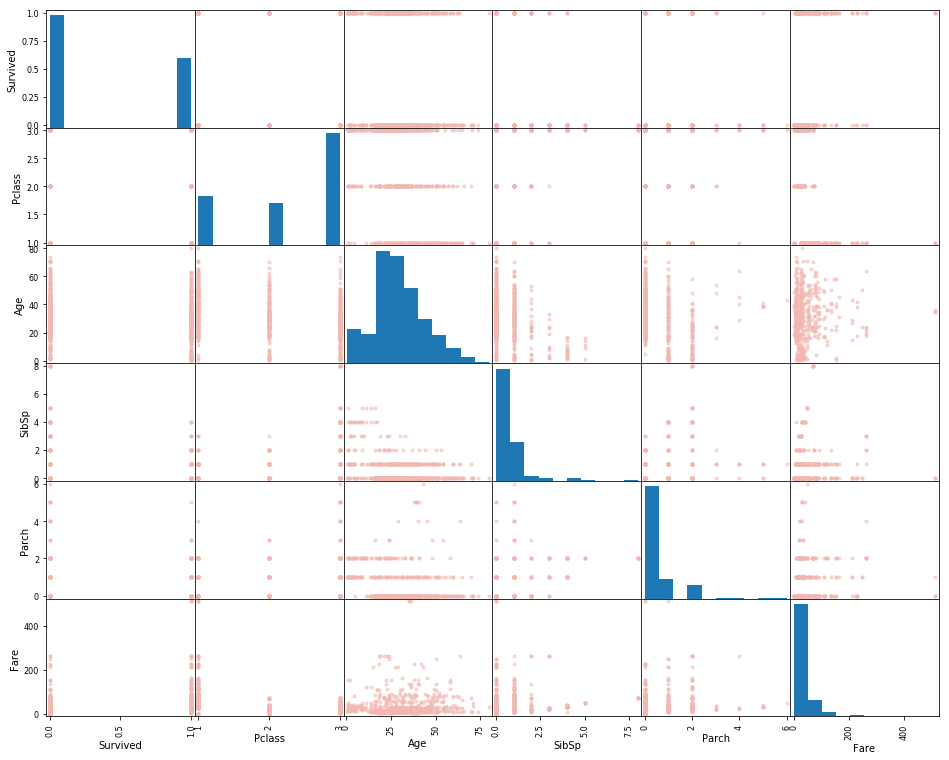

In [132]:
from pandas.tools.plotting import scatter_matrix

scatter_matrix(titanic_train, figsize=(16, 13), c="#f1b7b0")
plt.show()

It is quite difficult to read something informative from scatter plots since some of the data is not continous.

Let's then compute the correlation matrix showing value for correlation coefficient between each numerical attribute.

In [133]:
corr_matrix = titanic_train.corr()
corr_matrix

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


We can see some meaningful correlations here. To get even better intuition let's visualize the correlation matrix.

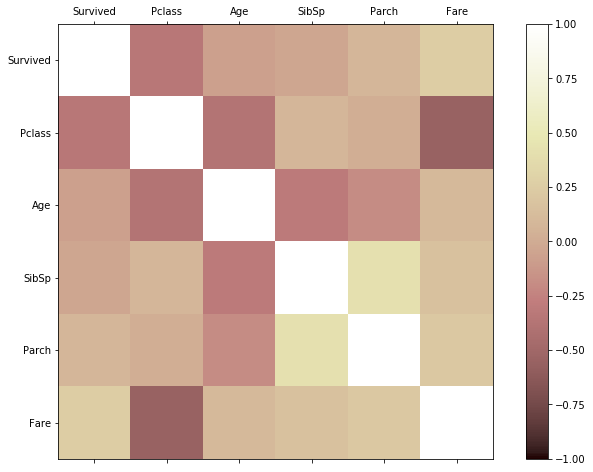

In [134]:
fig, axes = plt.subplots(figsize=(12, 8))
cax = axes.matshow(corr_matrix, vmin=-1, vmax=1, cmap=plt.cm.pink)
fig.colorbar(cax)
ticks = np.arange(0, len(corr_matrix), 1)
axes.set_xticks(ticks)
axes.set_yticks(ticks)
axes.set_xticklabels(corr_matrix)
axes.set_yticklabels(corr_matrix)
plt.show()

Analyzing correlation let's remember that our target value is `Survived` attribute. Let's concentrate for now on correlation between target value and other attributes. We see quite stron positive correlation between `Fare` and `Survived` attributes values (0.2573) meaning that who payed more for the ticked could have for some reason higher chances for survival. There is also quite strong negative correlation between `Pclass` and `Survived` attributes values (-0.3385) similarly meaning that the higher class passenger was travelling the lower was risk for not surviving. The rest of the attributes seems not correlated with `Survived`. 

Looking on other at relations between other attributes an obvious intution is strong negative correlation between `Pclass` and `Fare` (-0.5495): the more expensive ticket usually means better standard and lower class number (1st class is the most luxourious).

Other interesting insight is quite strong positive correlation between `SibSp` and `Parch` attributes meaning that someone who tends to travel with siblings or spouse tends to also travel with parents or children.

Surprising is positive correlation between `Parch` and `Fare` attributes (0.2162) meaning that person traveling with parents or children tends to pay more for the ticket. Similar but with lower correlation in case of `SibSp` attribute.

Other more distinct relation we can see in the dataset is negative correlation between `Pclass` and `Age` (-0.3692). We can interpret is as the lower class number the higher age which seems reasonable.

Also interesting is the high negative correlation between `Age` and `SibSp` (-0.3083). It conveys interesting fact that the older passenger was the lower was the number of siblings travelling with.

We now have quite deep insight in what is going on, in general, in the dataset. 

Now we will proceed to answering question posed at the begining of this analysis.

### 3.3 What was Titanic passengers demographic structure analyzed in terms of attributes?

In this part we will analyze attributes we found meaningful in terms of survival analysis: `Pclass`, `Sex`, `Age`, `SibSp`, `Parch`, `Fare` and `Embarked`. We will not analyze `Name`, `Ticket` and `Cabin` attributes since we found that they do not convey information in terms of population survival analysis.

Let's start with ticket class analysis - how many passengers travelled in each of the ticket classes. On Titanic there were three tickets classes: first, second and third. They are represented in the dataset using values 1, 2 and 3.  

In [135]:
titanic_class_counts = titanic_train["Pclass"].value_counts(sort=False)
titanic_class_counts

1    216
2    184
3    491
Name: Pclass, dtype: int64

Let's see how does this population of passengers looks like.

In [136]:
def get_waffle_plot(data, rows, title):
    colors=("#f1b7b0", "#f0f0f0", "#e3d8c0", "#f9d9ac", "#f1b7b0", "#f0f0f0", "#e3d8c0", "#f9d9ac")
    fig = plt.figure(
        FigureClass=Waffle, 
        rows=rows,
        values=data, 
        colors=colors[:len(data)],
        title={'label': title, 'loc': 'left', "fontsize": 14},
        figsize=(20, 4),
        labels=["{} ({} passengers, {:.2f}%)".format(k, v, v / sum(data.values()) * 100) for k, v in data.items()],
        legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.3), 'ncol': len(data), 'framealpha': 0, "fontsize": 14, "handlelength": 0.7}
)
    plt.show()


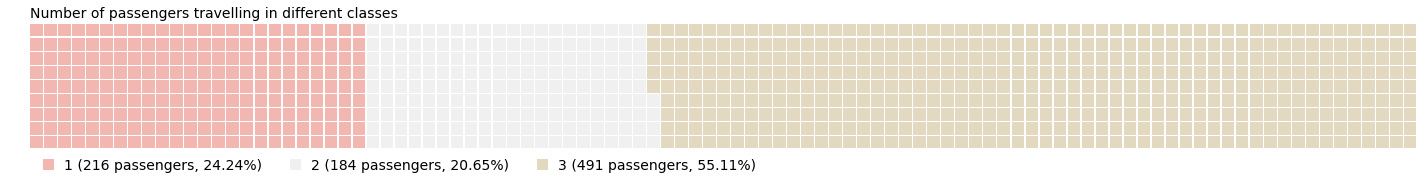

In [137]:
get_waffle_plot(titanic_class_counts.to_dict(), rows=9, title="Number of passengers travelling in different classes")

We see that vast majority (55.11%) of passengers travelled in lowest third class and almost 25% of passengers travelled in first class. 

In [138]:
titanic_sex_counts = titanic_train["Sex"].value_counts()
titanic_sex_counts

male      577
female    314
Name: Sex, dtype: int64

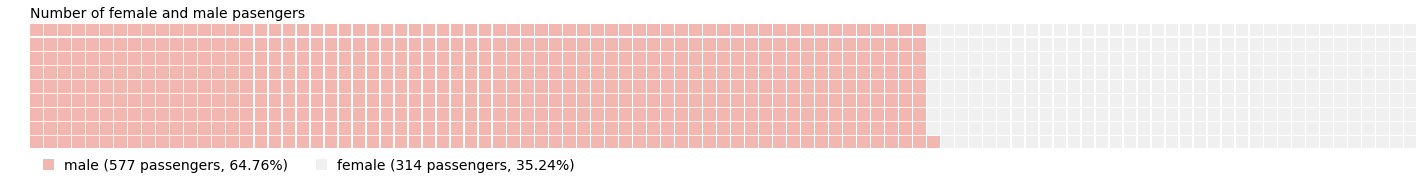

In [139]:
get_waffle_plot(titanic_sex_counts.to_dict(), rows=9, title="Number of female and male pasengers")

Majority of all passengers were males (64.76%) with only 35.24% of females.

To analyze age we need first to bin the data into meaningful age groups.

In [140]:
titanic_age_groups_counts = pd.cut(titanic_train["Age"], bins=[0, 14, 24, 34, 44, 54, 64, 80]).value_counts().sort_index()
titanic_age_groups_counts

(0, 14]      77
(14, 24]    200
(24, 34]    201
(34, 44]    121
(44, 54]     73
(54, 64]     31
(64, 80]     11
Name: Age, dtype: int64

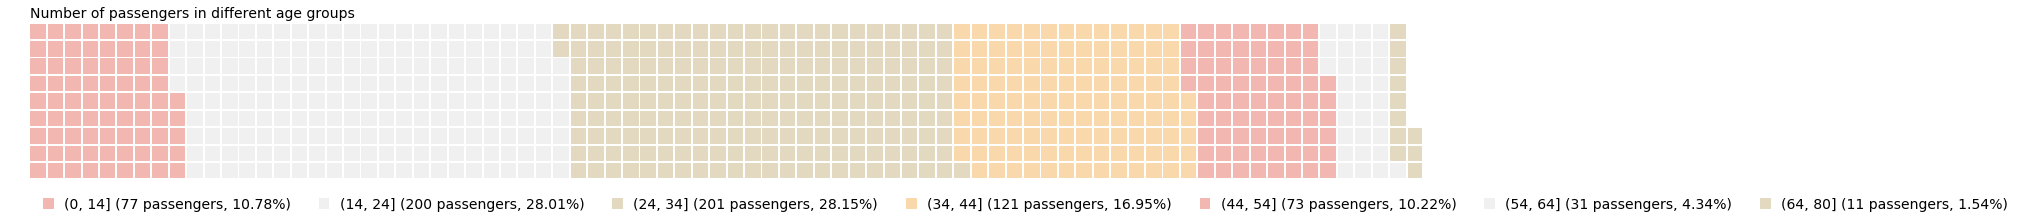

In [141]:
get_waffle_plot(titanic_age_groups_counts.to_dict(), rows=9, title="Number of passengers in different age groups")

10.78% of passengers were children in age 0-14. A little ober 28% of passengers were both between 14-24 and 24-34 years old. Almost 17% of all passengers were 34-44 years old. Only 16% of all passengers were above 44 years old. That tells us that Titanic passengers population was quite young.

Just out of interest let's dig a bit deeper into passengers age distribution properties.

In [142]:
titanic_train["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

We can see that the youngest passenger was 5 months old (0.42 year old). Let's see who she or he was.

In [143]:
titanic_train.loc[titanic_train["Age"].argmin()]

Survived                                  1
Pclass                                    3
Name        Thomas, Master. Assad Alexander
Sex                                    male
Age                                    0.42
SibSp                                     0
Parch                                     1
Ticket                                 2625
Fare                                 8.5167
Cabin                                   NaN
Embarked                                  C
Name: 804, dtype: object

It was a boy: Assed Alexander Thomas was born in Hardīn, Lebanon on 8 November 1911. He survived Titanic catastrophy - you can read his story [here](https://www.encyclopedia-titanica.org/titanic-survivor/assad-alexander-thomas-tannous.html).

On the other side of passengers dataset age distribution is the oldest passenger who was 80. Let's see who she or he was.

In [144]:
titanic_train.loc[titanic_train["Age"].argmax()]

Survived                                       1
Pclass                                         1
Name        Barkworth, Mr. Algernon Henry Wilson
Sex                                         male
Age                                           80
SibSp                                          0
Parch                                          0
Ticket                                     27042
Fare                                          30
Cabin                                        A23
Embarked                                       S
Name: 631, dtype: object

By accident we found some error in the Titanic dataset. When you read Algernon Henry Wilson Barkworth biography (you can find it [here](https://www.encyclopedia-titanica.org/titanic-survivor/algernon-barkworth.html)), we can read that he was born in 1864. That means that in 1912, when Titanic catastrophy happened, he was 48 years old and not 80 as stated in the dataset. So why 80 in the data set? We can further read that this person died in 1945 - aged 80. 

This means that dataset age this passenger contains value of post Titanic death age and not day of catastrophy age as it does for other survived passengers age attribute values. This inconsistency makes the data invalid and confusingwhen it comes to factual or historical value.

For this reason we decide to discard this passenger data from further analysis or modelling.


In [145]:
titanic_train = titanic_train.drop(titanic_train["Age"].argmax(), axis=0)

In [146]:
titanic_train["Age"].describe()

count    713.000000
mean      29.628569
std       14.413774
min        0.420000
25%       20.000000
50%       28.000000
75%       38.000000
max       74.000000
Name: Age, dtype: float64

And now we need to bin passengers ages once again.

In [147]:
titanic_age_groups_counts = pd.cut(titanic_train["Age"], bins=[0, 14, 24, 34, 44, 54, 64, 80]).value_counts().sort_index()
titanic_age_groups_counts

(0, 14]      77
(14, 24]    200
(24, 34]    201
(34, 44]    121
(44, 54]     73
(54, 64]     31
(64, 80]     10
Name: Age, dtype: int64

Let's now check again who is the oldest passenger in the data set - after removing the incorect data record.

In [148]:
titanic_train.loc[titanic_train["Age"].argmax()]

Survived                      0
Pclass                        3
Name        Svensson, Mr. Johan
Sex                        male
Age                          74
SibSp                         0
Parch                         0
Ticket                   347060
Fare                      7.775
Cabin                       NaN
Embarked                      S
Name: 852, dtype: object

So now we have for sure the oldest known Titanic passenger. His name was Johan Svensson, aged 74 and unfortunatelly died in the catastrophy (read more [here](https://www.encyclopedia-titanica.org/titanic-victim/johan-svensson.html)).

In [149]:
titanic_sibsp_counts = titanic_train["SibSp"].value_counts()
titanic_sibsp_counts

0    607
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

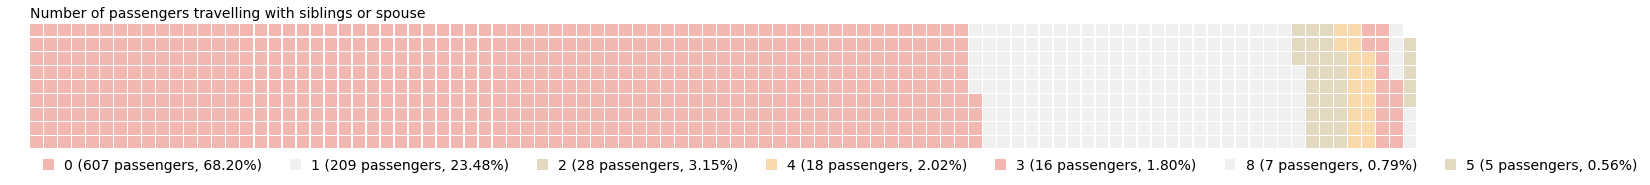

In [150]:
get_waffle_plot(titanic_sibsp_counts.to_dict(), rows=9, title="Number of passengers travelling with siblings or spouse")

Vast majority of passengers travelled without any siblings or spouse - 68.24%. 23.46% of passengers travelled with one child or spouse. Less than 9% of all passengers traveled with more than one sibling or spouse.

In [151]:
titanic_parch_counts = titanic_train["Parch"].value_counts()
titanic_parch_counts

0    677
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

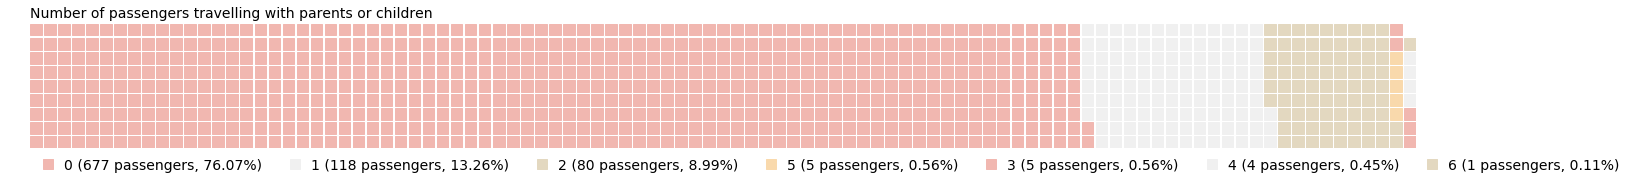

In [152]:
get_waffle_plot(titanic_parch_counts.to_dict(), rows=9, title="Number of passengers travelling with parents or children")

The situation is very similar in case of passengers travelling with parents or children. Most of them (76.09%) travelled alone and 13.24% travelled with just one parent or children. 8.89 passengers travelled with two parents or children.

In [153]:
titanic_fare_groups_counts = pd.cut(titanic_train["Fare"], bins=[0, 20, 40, 60, 80, 100, 300, 600]).value_counts().sort_index()
titanic_fare_groups_counts

(0, 20]       500
(20, 40]      199
(40, 60]       54
(60, 80]       48
(80, 100]      21
(100, 300]     50
(300, 600]      3
Name: Fare, dtype: int64

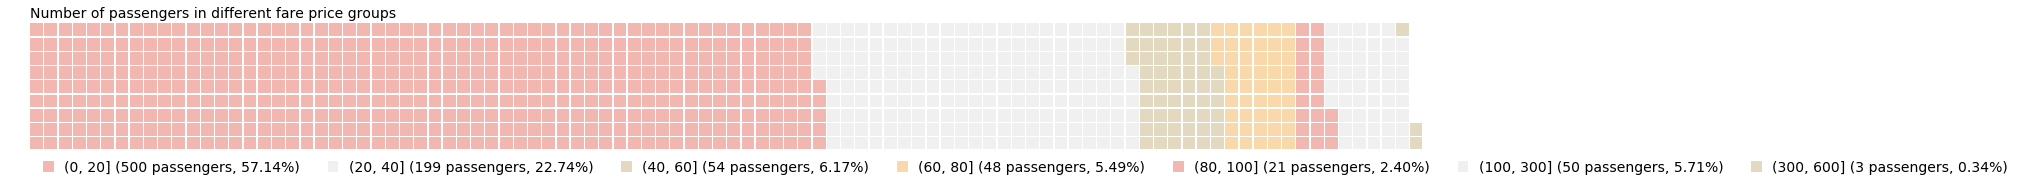

In [154]:
get_waffle_plot(titanic_fare_groups_counts.to_dict(), rows=9, title="Number of passengers in different fare price groups")

In terms ticket fare over the half (57.08%) of passengers paid the lowest fare ranging from 0 to 20. Let's remember that we saw that 55.11% of passengers travelled in third class. That follows the result seen here: third class was the cheapest way to travel and the number of passengers in the third class in almost the same as number of passengers who were in the lowest fare group. Again 22.83% passengers paid between 20 and 40 fare. That approximately corresponds to 20.65% of passengers travelling in the second class. We see that the rest of the ticket prices - which most likely are first class tickets - varies very much probably meaning some additional luxuries and services. And also there is relatively small number of such tickets.

In [155]:
titanic_embarked_counts = titanic_train["Embarked"].value_counts()
titanic_embarked_counts

S    643
C    168
Q     77
Name: Embarked, dtype: int64

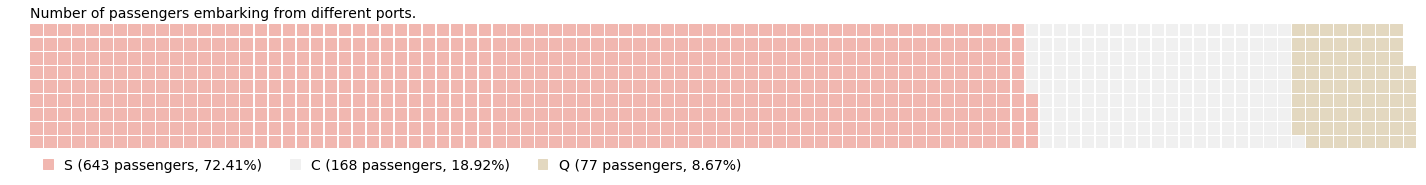

In [156]:
get_waffle_plot(titanic_embarked_counts.to_dict(), rows=9, title="Number of passengers embarking from different ports.")

We can see that vast majority of passengers embarked in Southampton (72.44%), 18.9% embarked in Cherbourg and only 8.66% of passengers embarked Titanic in Queenstown.

### 3.4 What is the overall Titanic passengers survival ratio? 

We will now try to answer what is the overall Titanic passengers survival ratio. To to that we will create survival ratio metric. We will define it as the ratio between the number of survived passengers and the overall number of passengers. We will use this value for later reference and comparison in other attributes analysis.

Our dataset contains 891 passengers data out of all 2224 passengers. This is partly due to the reason that we work with labeled train dataset with separate unlabeled test dataset with 418 passengers data set aside. In this analysis we will treat these 891 passengers not as a sample but rather as our whole population of 891 passengers. The same assumption will apply to subsequent parts of this analysis.

Let's now see what is the total number of survived passengers and and those who did not survive. 

In [157]:
titanic_survived_counts = titanic_train["Survived"].value_counts(sort=False)
titanic_survived_counts

0    549
1    341
Name: Survived, dtype: int64

Let's visualize it.

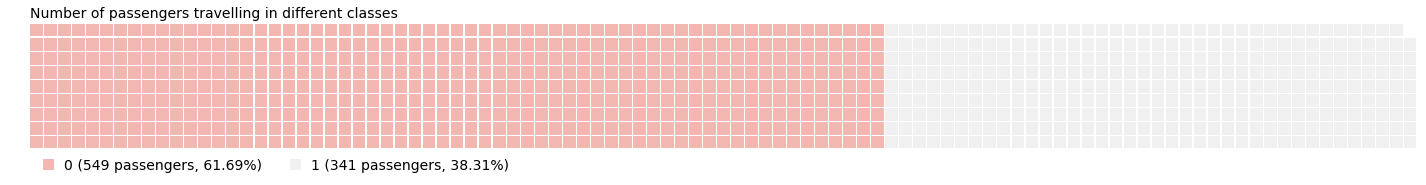

In [158]:
get_waffle_plot(titanic_survived_counts.to_dict(), rows=9, title="Number of passengers travelling in different classes")

Let's also create overall survival ratio metric.

In [159]:
def get_survival_ratio(passengers_df):
    return passengers_df["Survived"].sum() / passengers_df["Survived"].count()

In [160]:
overall_survival_ratio = get_survival_ratio(titanic_train)
overall_survival_ratio

0.38314606741573032

We see that from Titanic 891 passengers only 342 survived and 549 died. The Titanic survival ratio is approximately 0.3838, meaning that only 38.38% of all passengers (again, we are talking here about population of passengers in the dataset) survived the catastrophy. That is really small percentage. 

Again we can see that majority of Titanic passengers died in the catastrophy. Let's keep these values - especially the overal survival ratio metric among all Titanic passengers of 0.3838 - as a reference point for further analysis.


### 3.5 What is the survival ratio for different demographic passengers groups? Which groups have biggest chances for survival and which smallest?

Let's now finally see how survival ratio changes in groups belonging to attributes demographic sub-categories. In this analysis we will process the same attributes as in 3.3 part: `Pclass`, `Sex`, `Age`, `SibSp`, `Parch`, `Fare` and `Embarked`. 

We will start by grouping dataset using each of the attributes unique values. Later, based on these grouped values, we will calculate survival ratio for each of the attributes sub-groups.

In [161]:
titanic_pclass_group = titanic_train.groupby("Pclass")
titanic_pclass_group.groups

{1: Int64Index([  2,   4,   7,  12,  24,  28,  31,  32,  35,  36,
             ...
             854, 857, 858, 863, 868, 872, 873, 880, 888, 890],
            dtype='int64', name='PassengerId', length=215),
 2: Int64Index([ 10,  16,  18,  21,  22,  34,  42,  44,  54,  57,
             ...
             849, 855, 862, 865, 866, 867, 875, 881, 884, 887],
            dtype='int64', name='PassengerId', length=184),
 3: Int64Index([  1,   3,   5,   6,   8,   9,  11,  13,  14,  15,
             ...
             876, 877, 878, 879, 882, 883, 885, 886, 889, 891],
            dtype='int64', name='PassengerId', length=491)}

In [162]:
titanic_sex_group = titanic_train.groupby("Sex")
titanic_sex_group.groups

{'female': Int64Index([  2,   3,   4,   9,  10,  11,  12,  15,  16,  19,
             ...
             867, 872, 875, 876, 880, 881, 883, 886, 888, 889],
            dtype='int64', name='PassengerId', length=314),
 'male': Int64Index([  1,   5,   6,   7,   8,  13,  14,  17,  18,  21,
             ...
             874, 877, 878, 879, 882, 884, 885, 887, 890, 891],
            dtype='int64', name='PassengerId', length=576)}

In case of `Age` attribute we will group its values into age groups as we did previously in demographic analysis.

In [163]:
titanic_age_group = titanic_train.groupby(pd.cut(titanic_train["Age"], bins=[0, 14, 24, 34, 44, 54, 64, 80]))
titanic_age_group.groups

{'(0, 14]': Int64Index([  8,  10,  11,  15,  17,  25,  40,  44,  51,  59,  60,  64,  79,
             120, 126, 148, 165, 166, 172, 173, 183, 184, 185, 194, 206, 234,
             238, 262, 279, 298, 306, 341, 349, 375, 382, 387, 408, 420, 436,
             446, 447, 449, 470, 480, 481, 490, 531, 536, 542, 543, 550, 619,
             635, 643, 645, 684, 687, 692, 721, 732, 751, 752, 756, 778, 781,
             788, 789, 803, 804, 814, 820, 825, 828, 832, 851, 853, 870],
            dtype='int64', name='PassengerId'),
 '(14, 24]': Int64Index([  1,  13,  23,  28,  38,  39,  45,  50,  52,  57,
             ...
             854, 856, 859, 862, 865, 876, 877, 878, 883, 888],
            dtype='int64', name='PassengerId', length=200),
 '(24, 34]': Int64Index([  3,   9,  19,  22,  24,  35,  42,  54,  58,  67,
             ...
             871, 873, 875, 881, 882, 884, 885, 887, 890, 891],
            dtype='int64', name='PassengerId', length=201),
 '(34, 44]': Int64Index([  2,   4,   5,  14, 

In [164]:
titanic_sibsp_group = titanic_train.groupby("SibSp")
titanic_sibsp_group.groups

{0: Int64Index([  3,   5,   6,   7,   9,  12,  13,  15,  16,  18,
             ...
             881, 882, 883, 884, 885, 886, 887, 888, 890, 891],
            dtype='int64', name='PassengerId', length=607),
 1: Int64Index([  1,   2,   4,  10,  11,  14,  19,  26,  32,  35,
             ...
             850, 853, 855, 857, 862, 867, 870, 872, 875, 889],
            dtype='int64', name='PassengerId', length=209),
 2: Int64Index([ 39,  49,  70, 105, 121, 148, 184, 246, 302, 312, 331, 334, 393,
             437, 438, 449, 470, 530, 566, 572, 601, 619, 645, 656, 661, 666,
             743, 861],
            dtype='int64', name='PassengerId'),
 3: Int64Index([8, 25, 28, 64, 86, 89, 177, 230, 342, 375, 410, 486, 635, 643, 727,
             820],
            dtype='int64', name='PassengerId'),
 4: Int64Index([ 17,  51,  69, 120, 165, 172, 183, 234, 262, 267, 279, 542, 543,
             687, 788, 814, 825, 851],
            dtype='int64', name='PassengerId'),
 5: Int64Index([60, 72, 387, 481, 68

In [165]:
titanic_parch_group = titanic_train.groupby("Parch")
titanic_parch_group.groups

{0: Int64Index([  1,   2,   3,   4,   5,   6,   7,  10,  12,  13,
             ...
             878, 879, 882, 883, 884, 885, 887, 888, 890, 891],
            dtype='int64', name='PassengerId', length=677),
 1: Int64Index([  8,  11,  17,  25,  51,  55,  66,  98,  99, 103,
             ...
             836, 849, 853, 854, 856, 857, 870, 872, 880, 881],
            dtype='int64', name='PassengerId', length=118),
 2: Int64Index([  9,  28,  44,  59,  60,  64,  69,  72,  79,  89,  94, 120, 137,
             141, 148, 149, 154, 160, 166, 181, 183, 185, 202, 234, 238, 248,
             255, 256, 262, 298, 306, 312, 319, 325, 342, 378, 382, 387, 391,
             395, 418, 420, 436, 437, 446, 451, 473, 481, 499, 507, 534, 536,
             540, 541, 542, 543, 551, 586, 594, 609, 616, 635, 643, 660, 684,
             686, 743, 755, 764, 784, 789, 793, 803, 814, 820, 828, 847, 851,
             864, 889],
            dtype='int64', name='PassengerId'),
 3: Int64Index([87, 438, 737, 775, 859], dt

And also like in demographic analysis we will binnarize the `Fare` attribute values.

In [166]:
titanic_fare_group = titanic_train.groupby(pd.cut(titanic_train["Fare"], bins=[0, 20, 40, 60, 80, 100, 300, 600]))
titanic_fare_group.groups

{'(0, 20]': Int64Index([  1,   3,   5,   6,   9,  11,  13,  15,  16,  18,
             ...
             876, 877, 878, 879, 882, 883, 884, 885, 887, 891],
            dtype='int64', name='PassengerId', length=500),
 '(100, 300]': Int64Index([ 28,  32,  89, 119, 196, 216, 269, 270, 298, 300, 306, 307, 308,
             312, 319, 320, 326, 333, 335, 338, 342, 374, 378, 381, 391, 394,
             436, 439, 499, 506, 528, 538, 545, 551, 558, 582, 610, 660, 661,
             690, 699, 701, 709, 717, 731, 743, 764, 780, 803, 857],
            dtype='int64', name='PassengerId'),
 '(20, 40]': Int64Index([  8,  10,  12,  14,  17,  21,  24,  25,  26,  31,
             ...
             854, 855, 858, 863, 875, 881, 886, 888, 889, 890],
            dtype='int64', name='PassengerId', length=199),
 '(300, 600]': Int64Index([259, 680, 738], dtype='int64', name='PassengerId'),
 '(40, 60]': Int64Index([  4,   7,  36,  44,  60,  72,  75,  84, 111, 138, 167, 170, 186,
             249, 310, 330, 357, 37

In [167]:
titanic_embarked_group = titanic_train.groupby("Embarked")
titanic_embarked_group.groups

{'C': Int64Index([  2,  10,  20,  27,  31,  32,  35,  37,  40,  43,
             ...
             848, 850, 853, 859, 860, 867, 875, 876, 880, 890],
            dtype='int64', name='PassengerId', length=168),
 'Q': Int64Index([  6,  17,  23,  29,  33,  45,  47,  48,  83, 110, 117, 127, 144,
             157, 172, 187, 189, 197, 199, 209, 215, 242, 246, 261, 265, 275,
             279, 281, 290, 301, 302, 304, 323, 331, 359, 360, 365, 369, 389,
             412, 413, 422, 429, 460, 469, 502, 503, 511, 518, 526, 553, 561,
             574, 594, 613, 614, 627, 630, 654, 655, 658, 681, 698, 704, 719,
             728, 750, 768, 769, 777, 779, 788, 791, 826, 829, 886, 891],
            dtype='int64', name='PassengerId'),
 'S': Int64Index([  1,   3,   4,   5,   7,   8,   9,  11,  12,  13,
             ...
             878, 879, 881, 882, 883, 884, 885, 887, 888, 889],
            dtype='int64', name='PassengerId', length=643)}

With passengers data grouped with all meaningful attributes we can now proceed with calculating survival ration for each of the group. We will also prepend each group name (index value) with the attribute name for later analysis. This will help us to distinct groups with similar names created from separate attributes.

In [168]:
titanic_pclass_survival_ratio = titanic_pclass_group.apply(get_survival_ratio)
titanic_pclass_survival_ratio.index = ["Pclass: " + str(idx) for idx in titanic_pclass_survival_ratio.index]
titanic_pclass_survival_ratio

Pclass: 1    0.627907
Pclass: 2    0.472826
Pclass: 3    0.242363
dtype: float64

In [169]:
titanic_sex_survival_ratio = titanic_sex_group.apply(get_survival_ratio)
titanic_sex_survival_ratio.index = ["Sex: " + str(idx) for idx in titanic_sex_survival_ratio.index]
titanic_sex_survival_ratio

Sex: female    0.742038
Sex: male      0.187500
dtype: float64

In [170]:
titanic_age_survival_ratio = titanic_age_group.apply(get_survival_ratio)
titanic_age_survival_ratio.index = ["Age: " + str(idx) for idx in titanic_age_survival_ratio.index]
titanic_age_survival_ratio

Age: (0, 14]     0.584416
Age: (14, 24]    0.365000
Age: (24, 34]    0.388060
Age: (34, 44]    0.421488
Age: (44, 54]    0.410959
Age: (54, 64]    0.387097
Age: (64, 80]    0.000000
dtype: float64

In [171]:
titanic_sibsp_survival_ratio = titanic_sibsp_group.apply(get_survival_ratio)
titanic_sibsp_survival_ratio.index = ["Sibsp: " + str(idx) for idx in titanic_sibsp_survival_ratio.index]
titanic_sibsp_survival_ratio

Sibsp: 0    0.344316
Sibsp: 1    0.535885
Sibsp: 2    0.464286
Sibsp: 3    0.250000
Sibsp: 4    0.166667
Sibsp: 5    0.000000
Sibsp: 8    0.000000
dtype: float64

In [172]:
titanic_parch_survival_ratio = titanic_parch_group.apply(get_survival_ratio)
titanic_parch_survival_ratio.index = ["Parch: " + str(idx) for idx in titanic_parch_survival_ratio.index]
titanic_parch_survival_ratio

Parch: 0    0.342688
Parch: 1    0.550847
Parch: 2    0.500000
Parch: 3    0.600000
Parch: 4    0.000000
Parch: 5    0.200000
Parch: 6    0.000000
dtype: float64

In [173]:
titanic_fare_survival_ratio = titanic_fare_group.apply(get_survival_ratio)
titanic_fare_survival_ratio.index = ["Fare: " + str(idx) for idx in titanic_fare_survival_ratio.index]
titanic_fare_survival_ratio

Fare: (0, 20]       0.284000
Fare: (20, 40]      0.427136
Fare: (40, 60]      0.574074
Fare: (60, 80]      0.520833
Fare: (80, 100]     0.857143
Fare: (100, 300]    0.720000
Fare: (300, 600]    1.000000
dtype: float64

In [174]:
titanic_embarked_survival_ratio = titanic_embarked_group.apply(get_survival_ratio)
titanic_embarked_survival_ratio.index = ["Embarked: " + str(idx) for idx in titanic_embarked_survival_ratio.index]
titanic_embarked_survival_ratio

Embarked: C    0.553571
Embarked: Q    0.389610
Embarked: S    0.335925
dtype: float64

We will now combine all the survival ratios. As a reference we will also add an overall titanic survival ratio.

In [175]:
survival_ratios = pd.concat([
            titanic_pclass_survival_ratio,
            titanic_sex_survival_ratio,
            titanic_age_survival_ratio,
            titanic_sibsp_survival_ratio,
            titanic_parch_survival_ratio,
            titanic_fare_survival_ratio,
            titanic_embarked_survival_ratio], 
    axis=0)
survival_ratios["Overall"] = overall_survival_ratio
survival_ratios

Pclass: 1           0.627907
Pclass: 2           0.472826
Pclass: 3           0.242363
Sex: female         0.742038
Sex: male           0.187500
Age: (0, 14]        0.584416
Age: (14, 24]       0.365000
Age: (24, 34]       0.388060
Age: (34, 44]       0.421488
Age: (44, 54]       0.410959
Age: (54, 64]       0.387097
Age: (64, 80]       0.000000
Sibsp: 0            0.344316
Sibsp: 1            0.535885
Sibsp: 2            0.464286
Sibsp: 3            0.250000
Sibsp: 4            0.166667
Sibsp: 5            0.000000
Sibsp: 8            0.000000
Parch: 0            0.342688
Parch: 1            0.550847
Parch: 2            0.500000
Parch: 3            0.600000
Parch: 4            0.000000
Parch: 5            0.200000
Parch: 6            0.000000
Fare: (0, 20]       0.284000
Fare: (20, 40]      0.427136
Fare: (40, 60]      0.574074
Fare: (60, 80]      0.520833
Fare: (80, 100]     0.857143
Fare: (100, 300]    0.720000
Fare: (300, 600]    1.000000
Embarked: C         0.553571
Embarked: Q   

We will also prepare passengers count from each of above groups to visualize how big each of the analysed group was.

In [176]:
titanic_pclass_survival_count = titanic_pclass_group.apply(len)
titanic_sex_survival_count = titanic_sex_group.apply(len)
titanic_age_survival_count = titanic_age_group.apply(len)
titanic_sibsp_survival_count = titanic_sibsp_group.apply(len)
titanic_parch_survival_count = titanic_parch_group.apply(len)
titanic_fare_survival_count = titanic_fare_group.apply(len)
titanic_embarked_survival_count = titanic_embarked_group.apply(len)

groups_counts = pd.concat([
    titanic_pclass_survival_count,
    titanic_sex_survival_count,
    titanic_age_survival_count,
    titanic_sibsp_survival_count,
    titanic_parch_survival_count,
    titanic_fare_survival_count,
    titanic_embarked_survival_count
])
groups_counts["Overall"] = len(titanic_train)
groups_counts

1             215
2             184
3             491
female        314
male          576
(0, 14]        77
(14, 24]      200
(24, 34]      201
(34, 44]      121
(44, 54]       73
(54, 64]       31
(64, 80]       10
0             607
1             209
2              28
3              16
4              18
5               5
8               7
0             677
1             118
2              80
3               5
4               4
5               5
6               1
(0, 20]       500
(20, 40]      199
(40, 60]       54
(60, 80]       48
(80, 100]      21
(100, 300]     50
(300, 600]      3
C             168
Q              77
S             643
Overall       890
dtype: int64

Let's now visualize and analyze these results.

In [177]:
def get_groups_survival_ratio_plot(survival_ratios, groups_counts, labels, figsize=(20, 10)):
    idx = np.arange(len(survival_ratios))
    width = len(survival_ratios) / 50

    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=figsize, sharex=True)
    axes[0].bar(idx, groups_counts, width, color='#f9d9ac', label="Passengers number")
    axes[0].set_title("Atributes groups passengers counts")
    axes[0].set_ylabel("Number of passengers")
    axes[0].legend(loc=2)
    
    axes[1].bar(idx, survival_ratios, width, color='#f1b7b0', label="Survived")
    axes[1].bar(idx, 1 - survival_ratios, width, bottom=survival_ratios, color='#f0f0f0', label="Not survived")
    axes[1].set_title("Survival ratios for atributes groups")
    axes[1].set_ylabel("Survival ratio")
    axes[1].legend(loc=2)
    
    plt.xticks(idx, labels, rotation='vertical', fontsize=12)
    plt.tight_layout()
    plt.show()

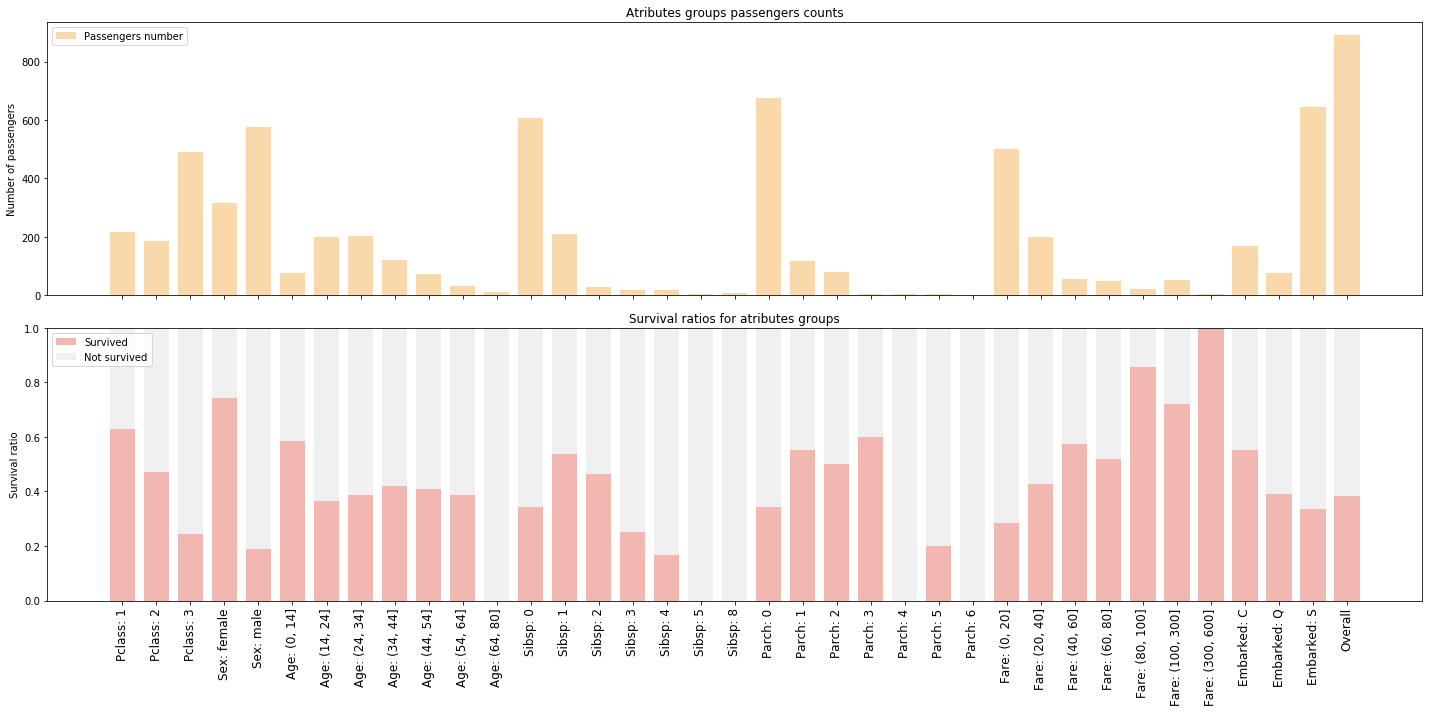

In [178]:
get_groups_survival_ratio_plot(survival_ratios.values, groups_counts.values, survival_ratios.index)

Let's now finally analyse the results we got. As a reference on the right hand side of the graph we places the overal Titanic passengers survival ratio 0.38. 

Let's start with `Pclass` survival ratio levels. As we could expect, based on popular knowledge, the first (and even second) class passengers had a lot greater chances of survival than third class passengers. The survival rate was 0.63 in the first class meaning that 62% of passengers travelling in this class survived. Second class had a bit lower survival rate of 0.47. But comparing that to the third class passengers survival ration of 0.24 is shocking. Only 24% of third class passengers survived the catastrophy. That plus the fact that third class was the most populated (third bar in the top plot) with 491 passengers (out of all 891 in this dataset) gives the image of dramatic situation these people were in. Looking for the reasons of this high mortality level is beyond the scope of this analysis.

Looking at `Sex` attribute values groups we also see clear relationship in terms of survival ratio values. Clearly women were more likely to survive than men with 0.74 survival ration for women and 0.18 for men. Again this is what we could expect from popular knowledge. This could be expected following "Women and children first" marine code of conduct (more about it [here](https://en.wikipedia.org/wiki/Women_and_children_first)). This fact is clearly visible in the data we see here.

Going step forward, was the same rescue law applied to children or maybe other age groups? Analysing `Age` attribute survival ratios it appears that the answer is positive. Passengers in the age group of 0-14 have much higher survival ration of 0.58 than the rest of passengers. Other passengers age groups oscilate around the overall survival ratio of 0.38. With one exception however: for age group of 64-80 passengers have very small survival rate of 0.09. Again this analysis is not a place to look for specific reasons for this fact. We just need to mention that there were only 11 passengers in this age group.

Let's now analyze `Sibsp` and groups of passengers travelling with different number of siblings or spouse. The data set specification defines siblings as: brother, sister, stepbrother, stepsister. It also defines spouse as: husband, wife. There is no other information in the data set that could help us to separate these two groups (whether passenger traveled with sibling, spouse or alone) so we will analyse as is recorded in the data set.

It is interesting whether travelling with siblings or spouse affected chances for survival. 608 passengers, meaning vast majority, traveled without any with 0.35 survival ratio. Passengers travelling with one and two sibling or spouse had higher survival chances of 0.54 and 0.46. There were passengers travelling 3, 4, 5 and 8 siblings or spouse on board. They survival ratio was lower and reaching 0 for the last two groups. Again analysing these groups survival ratio we need to remeber that very few passengers belonged to these groups. For example, only 7 passengers belonged to 8 siblings or spouse group. Let's see who they were.


In [179]:
titanic_train[titanic_train["SibSp"] == 8]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


As we can see it is a case of a tragic story of one big familly, all travelling in the third class. Unfortunatelly all died in the catastrophy. In fact it was two parents travelling with 8 children but three of them are not included in this dataset. That is why `SibSp` is 8 even though we have only 7 individuals here. You can read more about their story [here](https://www.encyclopedia-titanica.org/titanic-victim/thomas-henry-sage.html).

Moving on to analysis of `Parch` attribute survival ratio. Parch column in the data set according to data our data book represents number of parents or children aboard the Titanic. This can include three seprate groups of passengers:
* children travelling with parents,
* adults travelling with children,
* adults travelling with parents.

We could be able to separate these three subcategories from Parch column information by age in further analysis. If Parch value in not equal to zero and the passenger age is less than 18 years old we will could assume that passenger is a child travelling with parent. If passenger is above 18 years old we could assume that she or he is an adult who travels with children. However of course it can happend that adult person is travelling with a parent and/or children. It is not distinct separation so we will perform analysis including all of these groups together.

Again vast majority of passengers (678) traveled without any children or parents with survival ratio of 0.34. We can see that passengers travelling with 1, 2 or 3 children or parents had bigger chances of survival (0.55, 0.50 and 0.60 accordingly), but again let's remember that these groups had much less passengers (118, 80, 5). There were only 10 passenger travelling with 4, 5 or 6 parents or children, they had smaller chances for survival but the group were to small to draw any conclusions.

When we look at `Fare` attribute survival ratio values we can see clear almost linear relation between the price o the ticket and the survival ratio. It looks like the more passenger paid for the ticket the bigger were the chances of survival. The survival ratio for passengers who bought the tickets for 0-20 was 0.28, for passengers with tickers between 20-40 the survival ration was 0.43. And for further groups: 40-60 0.57, 60-80 0.520833, 80-100 0.86, 100-300, 0.72, and for tickets with price between 300-600 the survival ratio was 1.00 meaning that all of these passengers survived. There are two facts we need to mention. First, the more expesive ticket the higher class in which passenger traveled meaning of course the higher chances for survival. Second, the number of passengers in groups of ticket prices above 40 is about 50 passengers making them small with only three passengers in the most expensive 300-600 ticket price range price group.

Finally let's look at the `Embarked` atribute passengers groups. As a reminder: `C` stands for Cherbourg port of departure, `Q` stands for Queenstown and `S` stands for Southampton. Majority of Titanic passengers (644) embarked in Southhampton. Also this group of passengers have the lowest survival ratio out of all three ports of embarkation (0.34). Similarly passengers who embarked in Queenstown had survival ratio equal to 0.39. However those who embarked in Cherbourg had survival ratio of 0.55. First of all there were much less passengers embarking in the last two ports the other two ports (77 in Queenstown and 168 in Cherbourg). We could guess, considering large number of passengers, that the third class passengers embarked mostly in Southhampton and Queenstown and that could be the reason for such small, as compared to Cherbourg port, survival ratio for passengers embarking here. Let's check it with data.

In [180]:
titanic_embarked_group.get_group("S")["Pclass"].value_counts(sort=False)

1    126
2    164
3    353
Name: Pclass, dtype: int64

In [181]:
titanic_embarked_group.get_group("Q")["Pclass"].value_counts(sort=False)

1     2
2     3
3    72
Name: Pclass, dtype: int64

In [182]:
titanic_embarked_group.get_group("C")["Pclass"].value_counts(sort=False)

1    85
2    17
3    66
Name: Pclass, dtype: int64

That confirms our hypothesis. Both in Southampton and Queenstown third class passengers, and those had much lower chances for survival, we the majority of embarking there. In Cherbourg port the situation was the opposite: first class passengers were the majority and that is the reason survival ration is so high for these passengers.